In [1]:
!pip3 install pandas
!pip3 install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import json

In [3]:
df = pd.read_csv('./london_weather.csv')

In [4]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [7]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [8]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [9]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

09:52:21 - cmdstanpy - INFO - Chain [1] start processing
09:52:23 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [11]:
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.460464,7.606835,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.415848,7.662687,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.632137,7.928867,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.372128,7.629149,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.070714,7.466914,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.617483,11.041451,12.845559,13.656289,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.520022,11.200932,12.845364,13.656886,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.781672,10.963671,12.845170,13.657483,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.769244,10.750104,12.844976,13.658080,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


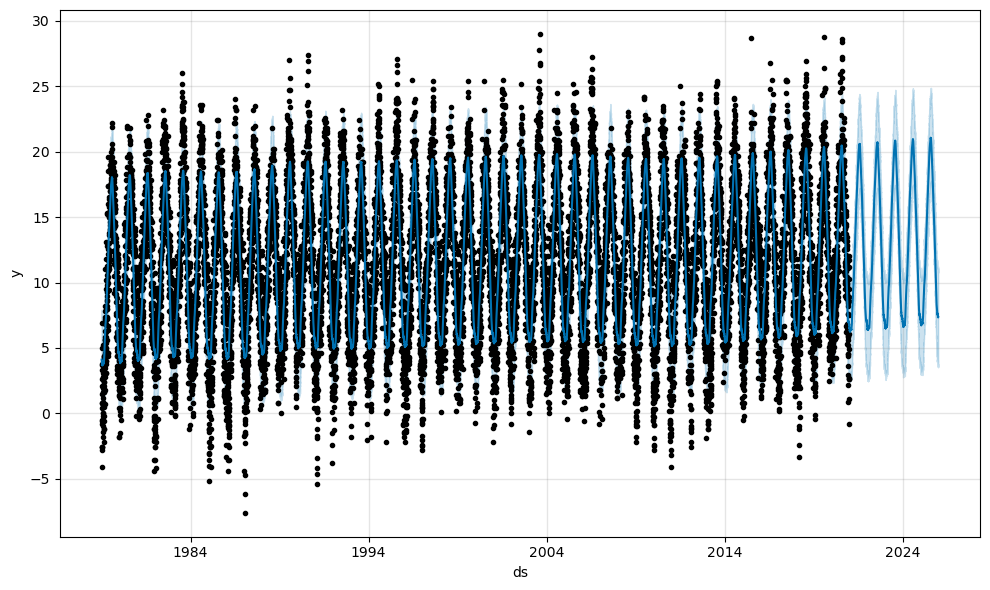

In [13]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [14]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [15]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

09:52:27 - cmdstanpy - INFO - Chain [1] start processing
09:52:28 - cmdstanpy - INFO - Chain [1] done processing
09:52:29 - cmdstanpy - INFO - Chain [1] start processing
09:52:30 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

In [ ]:
forecast_max

In [ ]:
forecast_min

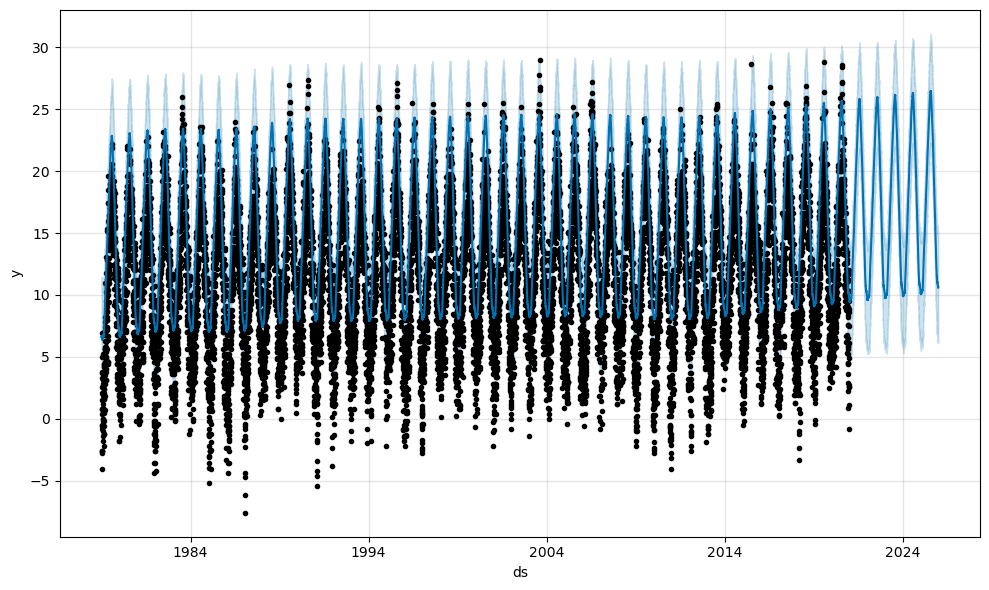

In [17]:
fig_max = model.plot(forecast_max)

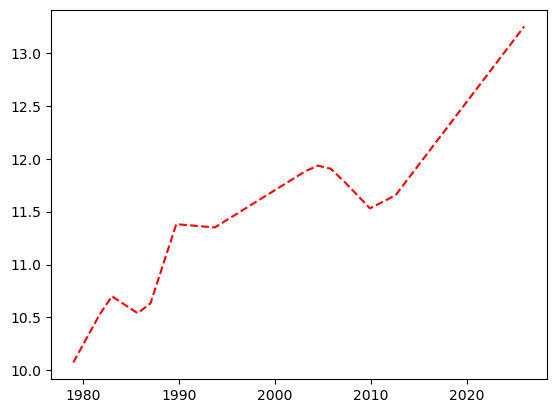

In [81]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')



In [19]:
forecast_reset_index = forecast.set_index('ds')

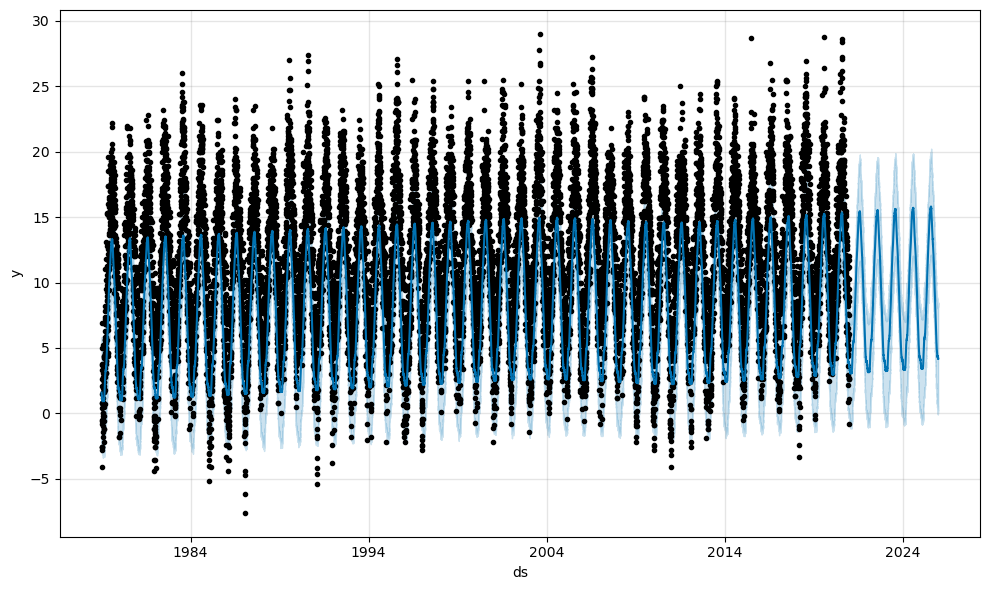

In [20]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

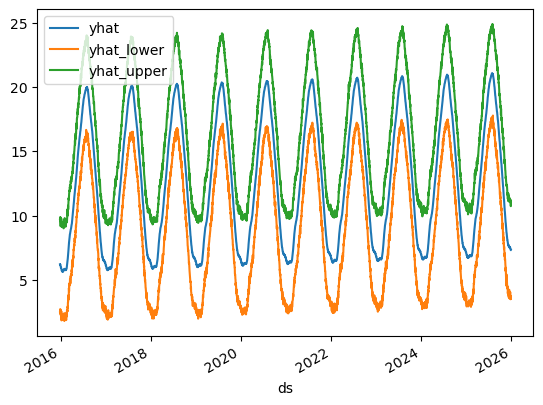

In [21]:
forecast_reset_index[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [22]:
# Prophet forecast with smaller dataseries
# 2016 - 2020, 2021- 2025 prediction

In [23]:
five_year_df = df.loc[df['date'] >= '2016']
five_year_df


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
13514,2016-01-01,6.0,0.0,13.0,11.3,5.6,1.3,2.8,101690.0,0.0
13515,2016-01-02,8.0,0.0,13.0,9.7,6.8,2.2,5.6,99810.0,0.0
13516,2016-01-03,6.0,0.0,13.0,10.9,7.3,4.9,7.2,99180.0,0.0
13517,2016-01-04,4.0,3.2,36.0,10.1,8.3,5.7,0.4,98280.0,0.0
13518,2016-01-05,6.0,2.1,30.0,9.2,7.6,5.1,0.4,98470.0,0.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [24]:
five_year_mean_df = five_year_df[['date', 'mean_temp']]
five_year_mean_df = five_year_mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [25]:
model_5_year_mean = Prophet()
model_5_year_mean.fit(five_year_mean_df)
five_year_future_mean = model_5_year_mean.make_future_dataframe(periods=1826)

09:52:37 - cmdstanpy - INFO - Chain [1] start processing
09:52:37 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
forecast_5_year_mean = model_5_year_mean.predict(five_year_future_mean)
forecast_mean_comparison = forecast.loc[forecast['ds'] >= '2016']
model


In [52]:
forecast_5_year_mean

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,11.861914,2.555321,9.657528,11.861914,11.861914,-5.699754,-5.699754,-5.699754,-0.159298,-0.159298,-0.159298,-5.540456,-5.540456,-5.540456,0.0,0.0,0.0,6.162160
1,2016-01-02,11.862506,2.811080,9.922016,11.862506,11.862506,-5.581487,-5.581487,-5.581487,0.050286,0.050286,0.050286,-5.631773,-5.631773,-5.631773,0.0,0.0,0.0,6.281019
2,2016-01-03,11.863099,2.773231,9.715293,11.863099,11.863099,-5.583094,-5.583094,-5.583094,0.147973,0.147973,0.147973,-5.731068,-5.731068,-5.731068,0.0,0.0,0.0,6.280005
3,2016-01-04,11.863692,2.566469,9.639455,11.863692,11.863692,-5.852093,-5.852093,-5.852093,-0.015495,-0.015495,-0.015495,-5.836598,-5.836598,-5.836598,0.0,0.0,0.0,6.011599
4,2016-01-05,11.864285,2.133585,9.481565,11.864285,11.864285,-5.971242,-5.971242,-5.971242,-0.024781,-0.024781,-0.024781,-5.946461,-5.946461,-5.946461,0.0,0.0,0.0,5.893043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2025-12-27,13.155654,4.489612,11.794912,13.031002,13.265913,-5.213324,-5.213324,-5.213324,0.050286,0.050286,0.050286,-5.263610,-5.263610,-5.263610,0.0,0.0,0.0,7.942329
3642,2025-12-28,13.155936,4.303754,11.583462,13.031116,13.266329,-5.155701,-5.155701,-5.155701,0.147973,0.147973,0.147973,-5.303674,-5.303674,-5.303674,0.0,0.0,0.0,8.000235
3643,2025-12-29,13.156219,4.236821,11.349917,13.031230,13.266744,-5.372075,-5.372075,-5.372075,-0.015495,-0.015495,-0.015495,-5.356580,-5.356580,-5.356580,0.0,0.0,0.0,7.784144
3644,2025-12-30,13.156502,3.949315,11.070828,13.031348,13.267160,-5.446525,-5.446525,-5.446525,-0.024781,-0.024781,-0.024781,-5.421744,-5.421744,-5.421744,0.0,0.0,0.0,7.709976


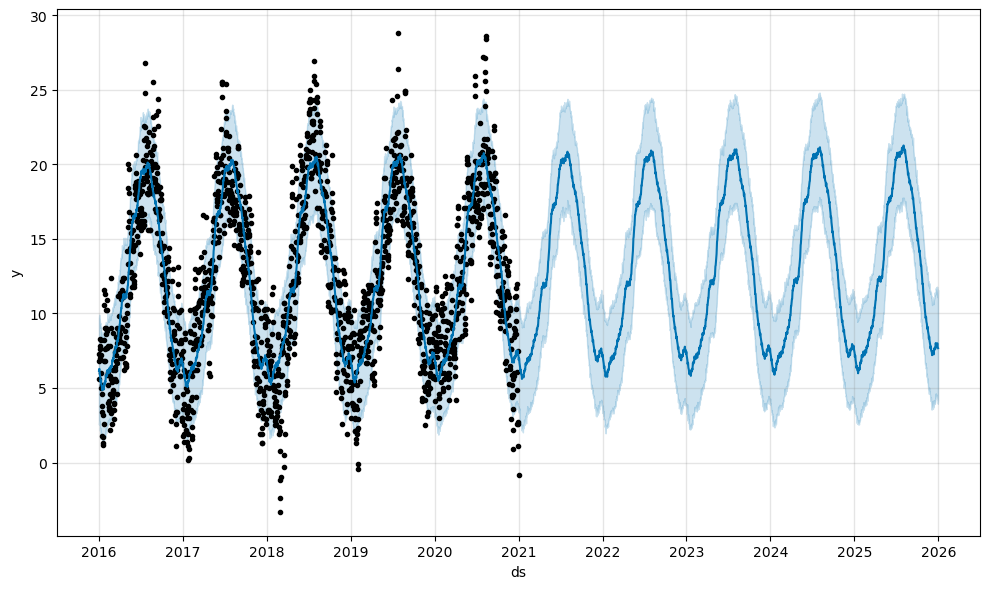

In [27]:
fig_5_year_mean = model_5_year_mean.plot(forecast_5_year_mean)

In [28]:
five_year_max_df = five_year_df[['date', 'max_temp']]
five_year_max_df = five_year_max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

five_year_min_df = five_year_df[['date', 'min_temp']]
five_year_min_df = five_year_min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [29]:
model_5_year_max = Prophet()
model_5_year_max.fit(five_year_max_df)
five_year_future_max = model_5_year_max.make_future_dataframe(periods=1825)

model_5_year_min = Prophet()
model_5_year_min.fit(five_year_min_df)
five_year_future_min = model_5_year_min.make_future_dataframe(periods=1825)

09:52:38 - cmdstanpy - INFO - Chain [1] start processing
09:52:38 - cmdstanpy - INFO - Chain [1] done processing
09:52:39 - cmdstanpy - INFO - Chain [1] start processing
09:52:39 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
forecast_5_year_max = model_5_year_max.predict(five_year_future_max)

forecast_5_year_min = model_5_year_min.predict(five_year_future_min)

In [50]:
forecast_5_year_max

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,15.697157,4.060671,12.787379,15.697157,15.697157,-7.245207,-7.245207,-7.245207,-0.091007,-0.091007,-0.091007,-7.154200,-7.154200,-7.154200,0.0,0.0,0.0,8.451950
1,2016-01-02,15.698112,4.112634,13.267617,15.698112,15.698112,-7.157774,-7.157774,-7.157774,0.086628,0.086628,0.086628,-7.244401,-7.244401,-7.244401,0.0,0.0,0.0,8.540338
2,2016-01-03,15.699066,4.011329,12.803440,15.699066,15.699066,-7.319764,-7.319764,-7.319764,0.016372,0.016372,0.016372,-7.336136,-7.336136,-7.336136,0.0,0.0,0.0,8.379302
3,2016-01-04,15.700021,3.952853,12.562549,15.700021,15.700021,-7.342148,-7.342148,-7.342148,0.085509,0.085509,0.085509,-7.427657,-7.427657,-7.427657,0.0,0.0,0.0,8.357873
4,2016-01-05,15.700976,4.091778,12.485121,15.700976,15.700976,-7.512796,-7.512796,-7.512796,0.004408,0.004408,0.004408,-7.517204,-7.517204,-7.517204,0.0,0.0,0.0,8.188180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2025-12-26,16.837513,5.767478,13.933131,16.500416,17.193429,-6.845800,-6.845800,-6.845800,-0.091007,-0.091007,-0.091007,-6.754793,-6.754793,-6.754793,0.0,0.0,0.0,9.991714
3642,2025-12-27,16.837584,5.853711,14.798258,16.500416,17.193555,-6.723219,-6.723219,-6.723219,0.086628,0.086628,0.086628,-6.809846,-6.809846,-6.809846,0.0,0.0,0.0,10.114365
3643,2025-12-28,16.837654,5.547871,14.022076,16.500417,17.193682,-6.857616,-6.857616,-6.857616,0.016372,0.016372,0.016372,-6.873988,-6.873988,-6.873988,0.0,0.0,0.0,9.980038
3644,2025-12-29,16.837724,5.728119,14.180965,16.500418,17.193808,-6.860740,-6.860740,-6.860740,0.085509,0.085509,0.085509,-6.946249,-6.946249,-6.946249,0.0,0.0,0.0,9.976984


In [51]:
forecast_5_year_min

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,7.990045,0.149166,7.358733,7.990045,7.990045,-4.190838,-4.190838,-4.190838,-0.171839,-0.171839,-0.171839,-4.018999,-4.018999,-4.018999,0.0,0.0,0.0,3.799208
1,2016-01-02,7.990314,0.127459,8.086647,7.990314,7.990314,-3.917086,-3.917086,-3.917086,0.194291,0.194291,0.194291,-4.111377,-4.111377,-4.111377,0.0,0.0,0.0,4.073228
2,2016-01-03,7.990582,-0.144833,7.508698,7.990582,7.990582,-4.032481,-4.032481,-4.032481,0.184447,0.184447,0.184447,-4.216928,-4.216928,-4.216928,0.0,0.0,0.0,3.958101
3,2016-01-04,7.990851,-0.140442,7.521552,7.990851,7.990851,-4.311041,-4.311041,-4.311041,0.022882,0.022882,0.022882,-4.333923,-4.333923,-4.333923,0.0,0.0,0.0,3.679809
4,2016-01-05,7.991119,-0.800648,7.265821,7.991119,7.991119,-4.649606,-4.649606,-4.649606,-0.189253,-0.189253,-0.189253,-4.460354,-4.460354,-4.460354,0.0,0.0,0.0,3.341513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,2025-12-26,9.295983,1.373782,9.393455,9.242203,9.346871,-3.962775,-3.962775,-3.962775,-0.171839,-0.171839,-0.171839,-3.790936,-3.790936,-3.790936,0.0,0.0,0.0,5.333209
3646,2025-12-27,9.296390,1.699864,9.291352,9.242569,9.347343,-3.601292,-3.601292,-3.601292,0.194291,0.194291,0.194291,-3.795583,-3.795583,-3.795583,0.0,0.0,0.0,5.695098
3647,2025-12-28,9.296796,1.636066,9.731107,9.242936,9.347815,-3.632077,-3.632077,-3.632077,0.184447,0.184447,0.184447,-3.816524,-3.816524,-3.816524,0.0,0.0,0.0,5.664719
3648,2025-12-29,9.297203,1.514651,9.163093,9.243304,9.348287,-3.831185,-3.831185,-3.831185,0.022882,0.022882,0.022882,-3.854067,-3.854067,-3.854067,0.0,0.0,0.0,5.466018


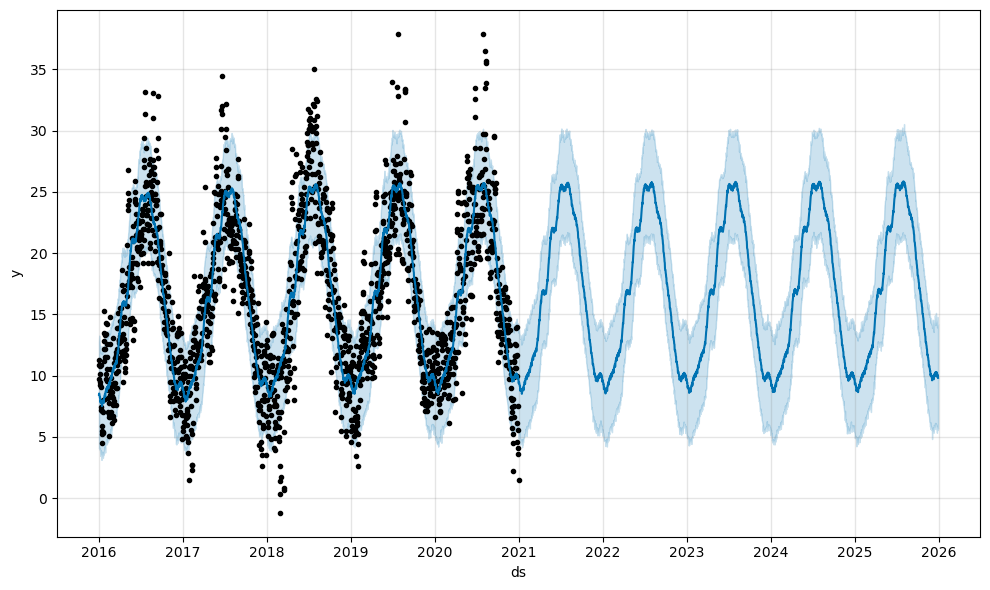

In [31]:
fig_5_year_max = model_5_year_max.plot(forecast_5_year_max)
ylabel ="Forecast (C)"
xlabel = 'Year'

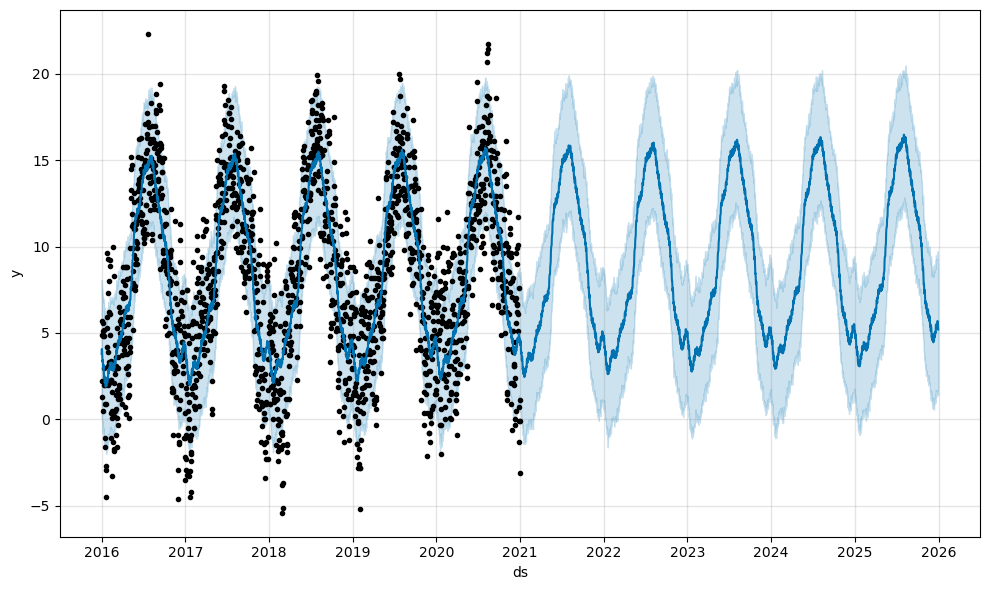

In [32]:
fig_5_year_min = model_5_year_min.plot(forecast_5_year_min)

In [34]:
# MAPE calculation using weather API

In [35]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [36]:
get_api.json()

[{'name': 'London',
  'local_names': {'ab': 'Лондон',
   'to': 'Lonitoni',
   'bo': 'ལོན་ཊོན།',
   'bg': 'Лондон',
   'en': 'London',
   'mk': 'Лондон',
   'kw': 'Loundres',
   'ig': 'London',
   'mt': 'Londra',
   'ug': 'لوندۇن',
   'hu': 'London',
   'no': 'London',
   'da': 'London',
   'mn': 'Лондон',
   'nv': 'Tooh Dineʼé Bikin Haalʼá',
   'eo': 'Londono',
   'so': 'London',
   'be': 'Лондан',
   'uk': 'Лондон',
   'es': 'Londres',
   'bs': 'London',
   'am': 'ለንደን',
   'th': 'ลอนดอน',
   'ku': 'London',
   'ff': 'London',
   'nl': 'Londen',
   'bm': 'London',
   'ht': 'Lonn',
   'sh': 'London',
   'kv': 'Лондон',
   'cy': 'Llundain',
   'id': 'London',
   'de': 'London',
   'sv': 'London',
   'it': 'Londra',
   'he': 'לונדון',
   'et': 'London',
   'hy': 'Լոնդոն',
   'mr': 'लंडन',
   'fr': 'Londres',
   'lo': 'ລອນດອນ',
   'ia': 'London',
   'ro': 'Londra',
   'ja': 'ロンドン',
   'gv': 'Lunnin',
   'rm': 'Londra',
   'jv': 'London',
   'sn': 'London',
   'ps': 'لندن',
   'sm': 'Lonet

In [37]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'ab': 'Лондон',
  'to': 'Lonitoni',
  'bo': 'ལོན་ཊོན།',
  'bg': 'Лондон',
  'en': 'London',
  'mk': 'Лондон',
  'kw': 'Loundres',
  'ig': 'London',
  'mt': 'Londra',
  'ug': 'لوندۇن',
  'hu': 'London',
  'no': 'London',
  'da': 'London',
  'mn': 'Лондон',
  'nv': 'Tooh Dineʼé Bikin Haalʼá',
  'eo': 'Londono',
  'so': 'London',
  'be': 'Лондан',
  'uk': 'Лондон',
  'es': 'Londres',
  'bs': 'London',
  'am': 'ለንደን',
  'th': 'ลอนดอน',
  'ku': 'London',
  'ff': 'London',
  'nl': 'Londen',
  'bm': 'London',
  'ht': 'Lonn',
  'sh': 'London',
  'kv': 'Лондон',
  'cy': 'Llundain',
  'id': 'London',
  'de': 'London',
  'sv': 'London',
  'it': 'Londra',
  'he': 'לונדון',
  'et': 'London',
  'hy': 'Լոնդոն',
  'mr': 'लंडन',
  'fr': 'Londres',
  'lo': 'ລອນດອນ',
  'ia': 'London',
  'ro': 'Londra',
  'ja': 'ロンドン',
  'gv': 'Lunnin',
  'rm': 'Londra',
  'jv': 'London',
  'sn': 'London',
  'ps': 'لندن',
  'sm': 'Lonetona',
  'cs': 'Londýn',
  'sa': 'लन्डन्',
  'br': '

In [38]:
london['lat']

51.5073219

In [39]:
london['lon']

-0.1276474

In [40]:
london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat=51.5073219&lon=-0.1276474&date=2016-01-01&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
response = requests.get(london_api)
response

<Response [200]>

In [41]:
import datetime
import time

In [42]:
def generate_dates(start_date, end_date):
    dates = []
    target_date = start_date
    while target_date <= end_date:
        dates.append(target_date)
        target_date += datetime.timedelta(days=1)
    return dates

def get_api_london(date):
    #london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat={lat}&lon={lon}&date={date}&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
    #response = requests.get(london_api.format(lat=51.5074, lon=0.1278, date=date.strftime('%Y-%m-%d')))
    #return response

start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
dates = generate_dates(start_date, end_date)
min_temps = []
max_temps = []
mean_temps = []

for date in dates:
    api_response = get_api_london(date)
    if api_response.status_code == 200:
        data = api_response.json()
        min_temp = data['temperature']['min']
        max_temp = data['temperature']['max']
        mean_temp = data['temperature']['afternoon']
        min_temps.append(min_temp)
        max_temps.append(max_temp)
        mean_temps.append(mean_temp)
    else:
        print(f"Error: Unable to fetch data for date {date}")

    time.sleep(2)
    
weather_df = pd.DataFrame({
    'ds': dates,
    'Minimum Temperature (C)': min_temps,
    'Maximum Temperature (C)': max_temps,
    'Average Temperature (C)': mean_temps
})

weather_df


,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C)
0,2021-01-01,-0.04,4.37,2.99
1,2021-01-02,0.92,4.96,2.89
2,2021-01-03,1.77,6.03,4.28
3,2021-01-04,2.25,4.75,3.70
4,2021-01-05,2.10,4.21,3.59
...,...,...,...,...
1090,2023-12-27,8.61,11.99,11.79
1091,2023-12-28,10.28,12.64,11.93
1092,2023-12-29,6.50,11.14,10.21
1093,2023-12-30,7.02,12.05,11.62


In [ ]:
 #MAPE - 50yrs 

In [ ]:
#MAPE - mean temp

In [43]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-0.04,4.37,2.99,12.656062,3.024228,10.308910,12.656062,12.656062,-5.984790,...,-0.008151,-0.008151,-0.008151,-5.976639,-5.976639,-5.976639,0.0,0.0,0.0,6.671272
1,2021-01-02,0.92,4.96,2.89,12.656388,3.155644,10.106789,12.656388,12.656388,-6.042408,...,-0.028972,-0.028972,-0.028972,-6.013436,-6.013436,-6.013436,0.0,0.0,0.0,6.613980
2,2021-01-03,1.77,6.03,4.28,12.656714,3.035249,10.266436,12.656714,12.656714,-6.053864,...,-0.002883,-0.002883,-0.002883,-6.050981,-6.050981,-6.050981,0.0,0.0,0.0,6.602849
3,2021-01-04,2.25,4.75,3.70,12.657040,2.919323,10.122215,12.657040,12.657040,-6.097802,...,-0.009022,-0.009022,-0.009022,-6.088780,-6.088780,-6.088780,0.0,0.0,0.0,6.559238
4,2021-01-05,2.10,4.21,3.59,12.657366,2.845065,10.045197,12.657366,12.657366,-6.146846,...,-0.020539,-0.020539,-0.020539,-6.126307,-6.126307,-6.126307,0.0,0.0,0.0,6.510520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,3.617483,11.041451,12.845559,13.656289,-5.840213,...,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,NaN,NaN,NaN,13.249899,3.520022,11.200932,12.845364,13.656886,-5.840961,...,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,NaN,NaN,NaN,13.250225,3.781672,10.963671,12.845170,13.657483,-5.876358,...,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,NaN,NaN,NaN,13.250551,3.769244,10.750104,12.844976,13.658080,-5.919392,...,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


In [44]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

,ds,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),trend,trend_lower,trend_upper
0,2021-01-01,2.99,-0.04,4.37,12.656062,12.656062,12.656062
1,2021-01-02,2.89,0.92,4.96,12.656388,12.656388,12.656388
2,2021-01-03,4.28,1.77,6.03,12.656714,12.656714,12.656714
3,2021-01-04,3.70,2.25,4.75,12.657040,12.657040,12.657040
4,2021-01-05,3.59,2.10,4.21,12.657366,12.657366,12.657366
...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,12.845559,13.656289
17127,2025-12-28,NaN,NaN,NaN,13.249899,12.845364,13.656886
17128,2025-12-29,NaN,NaN,NaN,13.250225,12.845170,13.657483
17129,2025-12-30,NaN,NaN,NaN,13.250551,12.844976,13.658080


In [45]:
filtered_df = mape_df[(mape_df['ds'] >= '2021-01-01') & (mape_df['ds'] <= '2023-12-31')]
filtered_df

,ds,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),trend,trend_lower,trend_upper
0,2021-01-01,2.99,-0.04,4.37,12.656062,12.656062,12.656062
1,2021-01-02,2.89,0.92,4.96,12.656388,12.656388,12.656388
2,2021-01-03,4.28,1.77,6.03,12.656714,12.656714,12.656714
3,2021-01-04,3.70,2.25,4.75,12.657040,12.657040,12.657040
4,2021-01-05,3.59,2.10,4.21,12.657366,12.657366,12.657366
...,...,...,...,...,...,...,...
1090,2023-12-27,11.79,8.61,11.99,13.011321,12.845174,13.181777
1091,2023-12-28,11.93,10.28,12.64,13.011647,12.845274,13.182402
1092,2023-12-29,10.21,6.50,11.14,13.011973,12.845373,13.183058
1093,2023-12-30,11.62,7.02,12.05,13.012299,12.845473,13.183849


In [46]:
dates = filtered_df['ds']

actual_values  = filtered_df['Average Temperature (C)']
forecasted_values = filtered_df['trend']

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE1': mape_values}

df= pd.DataFrame(data)
df


,Date,Actual,Forecasted,MAPE1
0,2021-01-01,2.99,12.656062,323.279663
1,2021-01-02,2.89,12.656388,337.937296
2,2021-01-03,4.28,12.656714,195.717612
3,2021-01-04,3.70,12.657040,242.082154
4,2021-01-05,3.59,12.657366,252.572859
...,...,...,...,...
1090,2023-12-27,11.79,13.011321,10.358961
1091,2023-12-28,11.93,13.011647,9.066617
1092,2023-12-29,10.21,13.011973,27.443421
1093,2023-12-30,11.62,13.012299,11.981921


In [47]:
total_mape = df['MAPE1'].mean()
print("Total MAPE:", total_mape)

Total MAPE: 140.60244125123523


In [48]:
import numpy as np

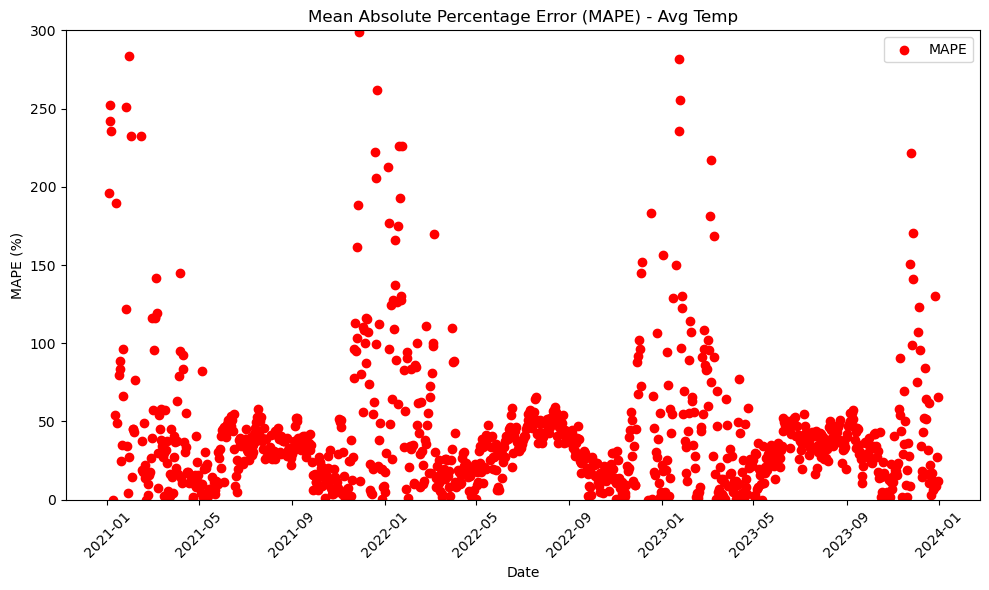

In [49]:
x= df['Date']
y = df['MAPE1']


plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='red', label='MAPE')


plt.title('Mean Absolute Percentage Error (MAPE) - Avg Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()



In [ ]:
#MAPE - min temp

In [ ]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

In [ ]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

In [ ]:
filtered_df = mape_df[(mape_df['ds'] >= '2021-01-01') & (mape_df['ds'] <= '2023-12-31')]
filtered_df

In [ ]:
dates = filtered_df['ds']

actual_values  = filtered_df['Minimum Temperature (C)']
forecasted_values = filtered_df['trend_lower'] 

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE2': mape_values}
df= pd.DataFrame(data)
df


In [ ]:
total_mape2 = df['MAPE2'].mean()
print("Total MAPE:", total_mape2)

In [ ]:
x= df['Date']
y = df['MAPE2']

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='red', label='MAPE')

plt.title('Mean Absolute Percentage Error (MAPE) - Min Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
#MAPE - max temp

In [ ]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

In [ ]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

In [ ]:
filtered_df = mape_df[(mape_df['ds'] >= '2021-01-01') & (mape_df['ds'] <= '2023-12-31')]
filtered_df

In [ ]:
dates = filtered_df['ds']

actual_values  = filtered_df['Maximum Temperature (C)']
forecasted_values = filtered_df['trend_upper'] 

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE3': mape_values}
df= pd.DataFrame(data)
df


In [ ]:
total_mape3 = df['MAPE3'].mean()
print("Total MAPE:", total_mape3)

In [ ]:
x= df['Date']
y = df['MAPE3']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='MAPE')

plt.title('Mean Absolute Percentage Error (MAPE) - Max Temp')

plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()



In [ ]:
 #MAPE - 5yrs 

In [ ]:
#MAPE - mean temp - 5 yrs

In [54]:
mape_5y_df = pd.merge(weather_df,forecast_5_year_mean, on= "ds", how = "outer")
mape_5y_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-0.04,4.37,2.99,12.640928,3.372074,10.322254,12.640928,12.640928,-5.767430,...,-0.159298,-0.159298,-0.159298,-5.608132,-5.608132,-5.608132,0.0,0.0,0.0,6.873498
1,2021-01-02,0.92,4.96,2.89,12.641211,3.657129,10.440592,12.641211,12.641211,-5.655303,...,0.050286,0.050286,0.050286,-5.705589,-5.705589,-5.705589,0.0,0.0,0.0,6.985908
2,2021-01-03,1.77,6.03,4.28,12.641493,3.555571,10.491023,12.641493,12.641493,-5.661759,...,0.147973,0.147973,0.147973,-5.809733,-5.809733,-5.809733,0.0,0.0,0.0,6.979734
3,2021-01-04,2.25,4.75,3.70,12.641776,3.619493,10.475205,12.641776,12.641776,-5.934192,...,-0.015495,-0.015495,-0.015495,-5.918698,-5.918698,-5.918698,0.0,0.0,0.0,6.707584
4,2021-01-05,2.10,4.21,3.59,12.642059,2.890391,10.159734,12.642059,12.642059,-6.055273,...,-0.024781,-0.024781,-0.024781,-6.030492,-6.030492,-6.030492,0.0,0.0,0.0,6.586785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2025-12-27,NaN,NaN,NaN,13.155654,4.489612,11.794912,13.031002,13.265913,-5.213324,...,0.050286,0.050286,0.050286,-5.263610,-5.263610,-5.263610,0.0,0.0,0.0,7.942329
3642,2025-12-28,NaN,NaN,NaN,13.155936,4.303754,11.583462,13.031116,13.266329,-5.155701,...,0.147973,0.147973,0.147973,-5.303674,-5.303674,-5.303674,0.0,0.0,0.0,8.000235
3643,2025-12-29,NaN,NaN,NaN,13.156219,4.236821,11.349917,13.031230,13.266744,-5.372075,...,-0.015495,-0.015495,-0.015495,-5.356580,-5.356580,-5.356580,0.0,0.0,0.0,7.784144
3644,2025-12-30,NaN,NaN,NaN,13.156502,3.949315,11.070828,13.031348,13.267160,-5.446525,...,-0.024781,-0.024781,-0.024781,-5.421744,-5.421744,-5.421744,0.0,0.0,0.0,7.709976


In [55]:
mape_5y_df = mape_5y_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_5y_df

,ds,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),trend,trend_lower,trend_upper
0,2021-01-01,2.99,-0.04,4.37,12.640928,12.640928,12.640928
1,2021-01-02,2.89,0.92,4.96,12.641211,12.641211,12.641211
2,2021-01-03,4.28,1.77,6.03,12.641493,12.641493,12.641493
3,2021-01-04,3.70,2.25,4.75,12.641776,12.641776,12.641776
4,2021-01-05,3.59,2.10,4.21,12.642059,12.642059,12.642059
...,...,...,...,...,...,...,...
3641,2025-12-27,NaN,NaN,NaN,13.155654,13.031002,13.265913
3642,2025-12-28,NaN,NaN,NaN,13.155936,13.031116,13.266329
3643,2025-12-29,NaN,NaN,NaN,13.156219,13.031230,13.266744
3644,2025-12-30,NaN,NaN,NaN,13.156502,13.031348,13.267160


In [56]:
filtered_5y_df = mape_5y_df[(mape_5y_df['ds'] >= '2021-01-01') & (mape_5y_df['ds'] <= '2023-12-31')]
filtered_5y_df

,ds,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),trend,trend_lower,trend_upper
0,2021-01-01,2.99,-0.04,4.37,12.640928,12.640928,12.640928
1,2021-01-02,2.89,0.92,4.96,12.641211,12.641211,12.641211
2,2021-01-03,4.28,1.77,6.03,12.641493,12.641493,12.641493
3,2021-01-04,3.70,2.25,4.75,12.641776,12.641776,12.641776
4,2021-01-05,3.59,2.10,4.21,12.642059,12.642059,12.642059
...,...,...,...,...,...,...,...
1090,2023-12-27,11.79,8.61,11.99,12.949028,12.890801,12.997260
1091,2023-12-28,11.93,10.28,12.64,12.949311,12.891026,12.997574
1092,2023-12-29,10.21,6.50,11.14,12.949594,12.891251,12.997887
1093,2023-12-30,11.62,7.02,12.05,12.949876,12.891475,12.998200


In [58]:
dates = filtered_5y_df['ds']

actual_values  = filtered_5y_df['Average Temperature (C)']
forecasted_values = filtered_5y_df['trend']

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE1': mape_values}

df_5y= pd.DataFrame(data)
df_5y

,Date,Actual,Forecasted,MAPE1
0,2021-01-01,2.99,12.640928,322.773511
1,2021-01-02,2.89,12.641211,337.412132
2,2021-01-03,4.28,12.641493,195.361993
3,2021-01-04,3.70,12.641776,241.669620
4,2021-01-05,3.59,12.642059,252.146479
...,...,...,...,...
1090,2023-12-27,11.79,12.949028,9.830606
1091,2023-12-28,11.93,12.949311,8.544099
1092,2023-12-29,10.21,12.949594,26.832456
1093,2023-12-30,11.62,12.949876,11.444719


In [59]:
total_mape = df_5y['MAPE1'].mean()
print("Total MAPE:", total_mape)

Total MAPE: 140.2824635411516


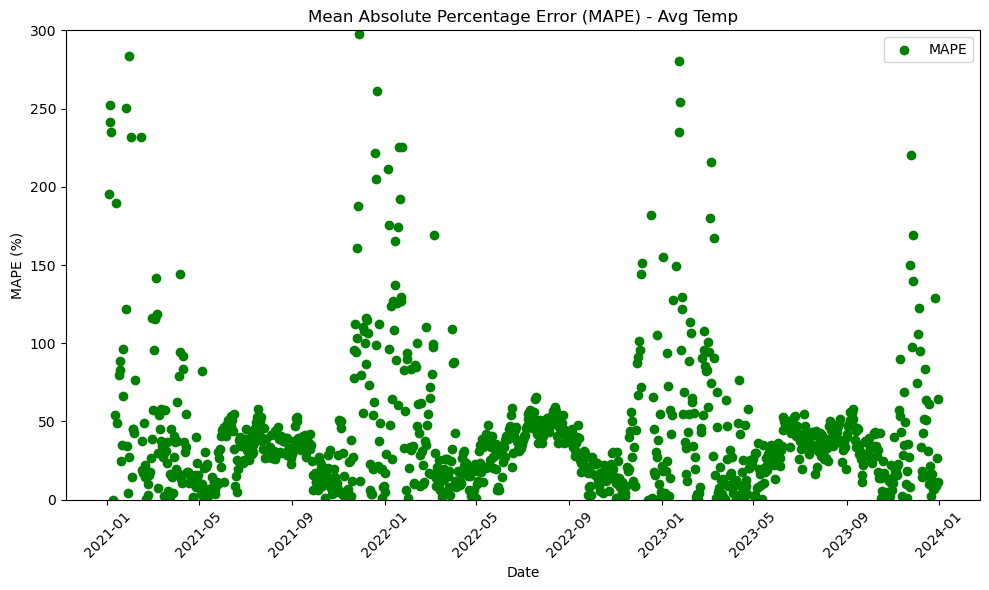

In [61]:
x= df_5y['Date']
y = df_5y['MAPE1']


plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='green', label='MAPE')


plt.title('Mean Absolute Percentage Error (MAPE) - Avg Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
#MAPE - min temp - 5 yrs

In [ ]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

In [ ]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

In [ ]:
filtered_df = mape_df[(mape_df['ds'] >= '2021-01-01') & (mape_df['ds'] <= '2023-12-31')]
filtered_df

In [ ]:
dates = filtered_df['ds']

actual_values  = filtered_df['Minimum Temperature (C)']
forecasted_values = filtered_df['trend_lower'] 

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE2': mape_values}
df= pd.DataFrame(data)
df

In [ ]:
total_mape2 = df['MAPE2'].mean()
print("Total MAPE:", total_mape2)

In [ ]:
x= df['Date']
y = df['MAPE2']

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='red', label='MAPE')

plt.title('Mean Absolute Percentage Error (MAPE) - Min Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
#MAPE - max temp - 5 yrs

In [ ]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

In [ ]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

In [ ]:
filtered_df = mape_df[(mape_df['ds'] >= '2021-01-01') & (mape_df['ds'] <= '2023-12-31')]
filtered_df

In [ ]:
dates = filtered_df['ds']

actual_values  = filtered_df['Maximum Temperature (C)']
forecasted_values = filtered_df['trend_upper'] 

def calculate_mape(actual, forecast):
    if actual == 0:
        return 0
    else:
        return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE3': mape_values}
df= pd.DataFrame(data)
df

In [ ]:
total_mape3 = df['MAPE3'].mean()
print("Total MAPE:", total_mape3)

In [ ]:
x= df['Date']
y = df['MAPE2']

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='red', label='MAPE')

plt.title('Mean Absolute Percentage Error (MAPE) - Min Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
x= df['Date']
y = df['MAPE3']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='MAPE')

plt.title('Mean Absolute Percentage Error (MAPE) - Max Temp')

plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.ylim(0,300)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout() 
plt.show()


In [ ]:
##Cross Validation

In [72]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/80 [00:00<?, ?it/s]

11:33:39 - cmdstanpy - INFO - Chain [1] start processing
11:33:40 - cmdstanpy - INFO - Chain [1] done processing
11:33:40 - cmdstanpy - INFO - Chain [1] start processing
11:33:40 - cmdstanpy - INFO - Chain [1] done processing
11:33:40 - cmdstanpy - INFO - Chain [1] start processing
11:33:40 - cmdstanpy - INFO - Chain [1] done processing
11:33:40 - cmdstanpy - INFO - Chain [1] start processing
11:33:40 - cmdstanpy - INFO - Chain [1] done processing
11:33:41 - cmdstanpy - INFO - Chain [1] start processing
11:33:41 - cmdstanpy - INFO - Chain [1] done processing
11:33:41 - cmdstanpy - INFO - Chain [1] start processing
11:33:41 - cmdstanpy - INFO - Chain [1] done processing
11:33:41 - cmdstanpy - INFO - Chain [1] start processing
11:33:41 - cmdstanpy - INFO - Chain [1] done processing
11:33:42 - cmdstanpy - INFO - Chain [1] start processing
11:33:42 - cmdstanpy - INFO - Chain [1] done processing
11:33:42 - cmdstanpy - INFO - Chain [1] start processing
11:33:42 - cmdstanpy - INFO - Chain [1]

11:35:05 - cmdstanpy - INFO - Chain [1] done processing
11:35:06 - cmdstanpy - INFO - Chain [1] start processing
11:35:08 - cmdstanpy - INFO - Chain [1] done processing
11:35:08 - cmdstanpy - INFO - Chain [1] start processing
11:35:09 - cmdstanpy - INFO - Chain [1] done processing
11:35:10 - cmdstanpy - INFO - Chain [1] start processing
11:35:12 - cmdstanpy - INFO - Chain [1] done processing
11:35:13 - cmdstanpy - INFO - Chain [1] start processing
11:35:15 - cmdstanpy - INFO - Chain [1] done processing
11:35:16 - cmdstanpy - INFO - Chain [1] start processing
11:35:17 - cmdstanpy - INFO - Chain [1] done processing
11:35:18 - cmdstanpy - INFO - Chain [1] start processing
11:35:20 - cmdstanpy - INFO - Chain [1] done processing
11:35:21 - cmdstanpy - INFO - Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
prophet_validation

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1981-01-26,4.652565,1.366222,8.045184,6.3,1981-01-25
1,1981-01-27,4.737007,1.429803,8.278378,8.4,1981-01-25
2,1981-01-28,4.819212,1.315808,8.145339,7.2,1981-01-25
3,1981-01-29,4.863783,1.635864,8.221610,7.0,1981-01-25
4,1981-01-30,4.620855,1.439561,8.051481,0.1,1981-01-25
...,...,...,...,...,...,...
29125,2020-12-27,6.717418,3.144486,10.178216,7.5,2020-01-01
29126,2020-12-28,6.700298,2.989215,10.360355,1.1,2020-01-01
29127,2020-12-29,6.652531,3.138005,10.409095,2.6,2020-01-01
29128,2020-12-30,6.682577,2.924680,10.534498,2.7,2020-01-01


In [74]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.292955,2.879749,2.307591,0.171572,0.294249,0.788096
1,38 days,8.234724,2.869621,2.300345,0.170069,0.295072,0.790720
2,39 days,8.193117,2.862362,2.295865,0.169223,0.295465,0.792825
3,40 days,8.243258,2.871107,2.304726,0.170174,0.297539,0.793169
4,41 days,8.255745,2.873281,2.307808,0.170174,0.297949,0.792997
...,...,...,...,...,...,...,...
324,361 days,9.010016,3.001669,2.422599,0.185046,0.302320,0.774288
325,362 days,9.044015,3.007327,2.426777,0.184527,0.303167,0.773000
326,363 days,8.994570,2.999095,2.417881,0.184104,0.302354,0.773537
327,364 days,8.986715,2.997785,2.416946,0.183212,0.302255,0.773871


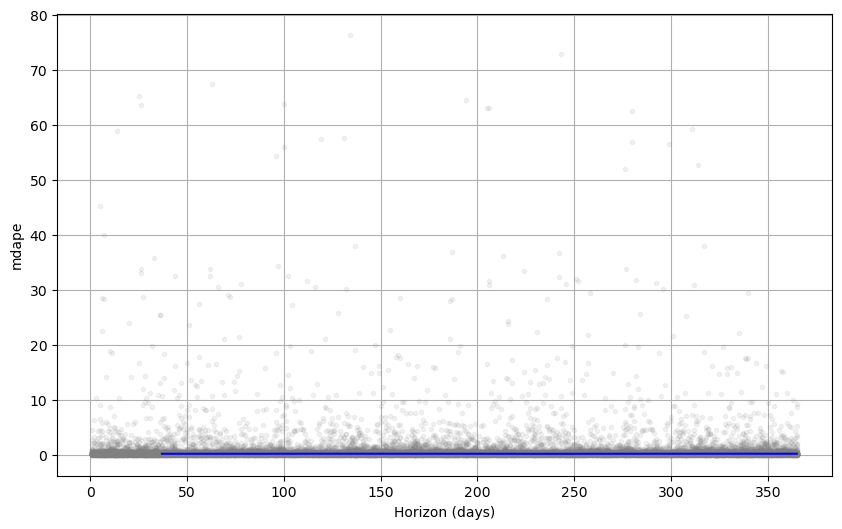

In [75]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

(0.0, 1.0)

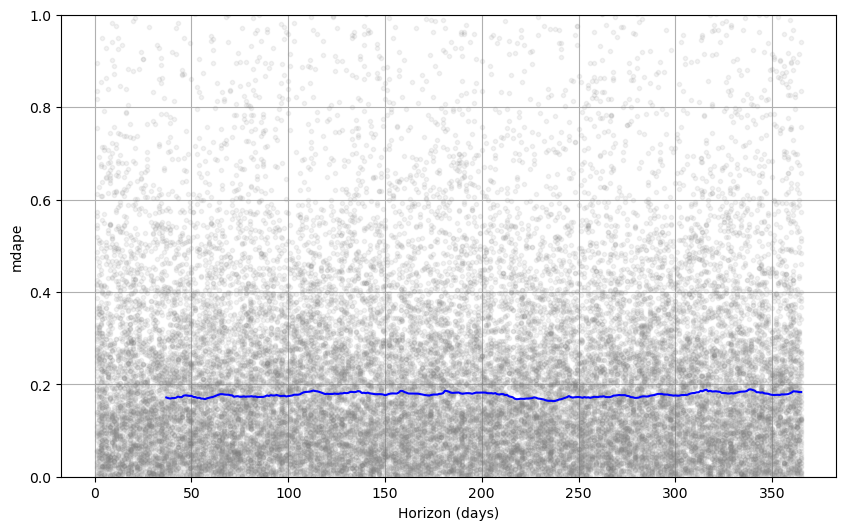

In [76]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [ ]:
# Over time the changes stay consistent around 18%